In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
problem_df = pd.read_csv("../data/problemsetall_data.csv")
problem_stat_df = pd.read_csv("../data/problemsetproblem_stat.csv")

In [37]:
problem_stat_df.head()

,contestId,level,solvedCount
0,1154,G,834
1,1154,F,947
2,1154,E,1967
3,1154,D,4243
4,1154,C,4487


In [12]:
tag_str = list(problem_df[problem_df.columns[4]])
tags = [i[1:-2].split("/") for i in tag_str]
#tags = [i.strip() for i in tags]

In [13]:
tt = []
for i in tags:
    for j in i:
        if j == '':
            pass
        else:
            tt.append(j.replace("'", "").strip())
tt = set(tt)
print(len(tt))

36


In [14]:
d = {t:0 for t in tt}
for index, row in problem_df.iterrows():
    for t in tt:
        if t in row[4]:
            d[t] += 1

print(len(d))

36


Text(0, 0.5, 'number of questions')

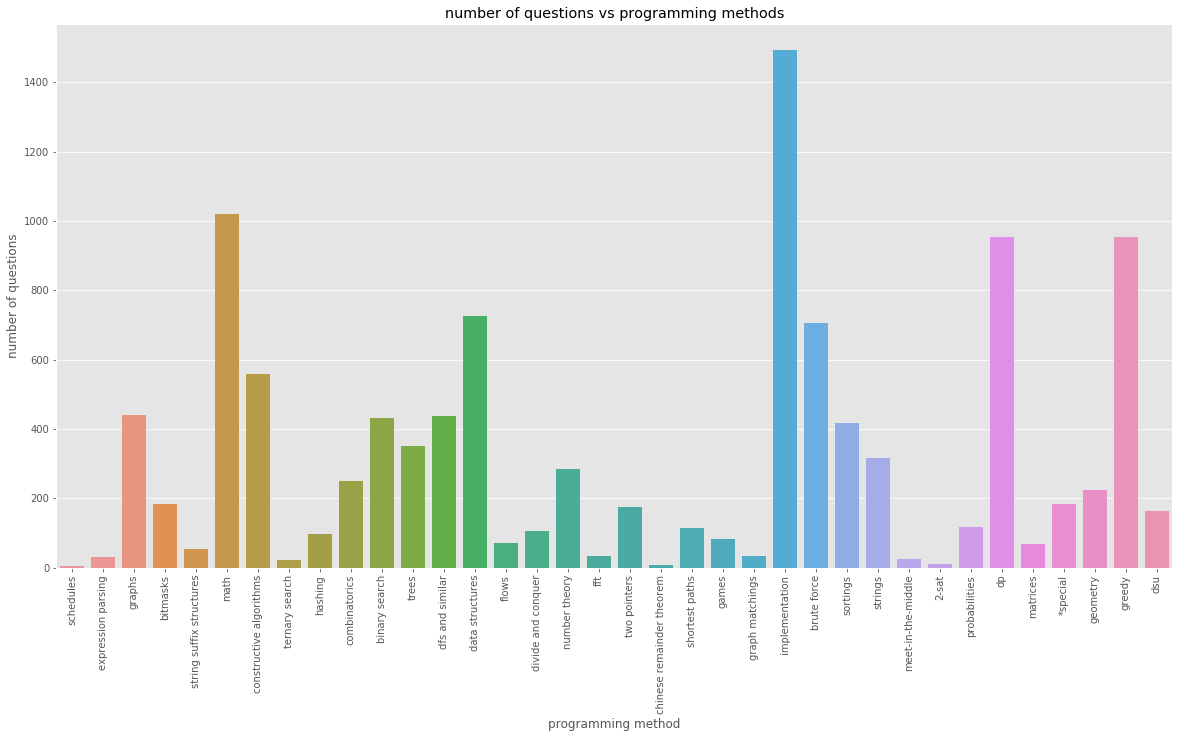

In [34]:
plt.figure(figsize=(20, 10))
plt.style.use('ggplot')
g = sns.barplot(x=list(d.keys()), y=list(d.values()))
for item in g.get_xticklabels():
    item.set_rotation(90)
plt.title("number of questions vs programming methods")
plt.xlabel("programming method")
plt.ylabel("number of questions")

In [24]:
l = set(list(problem_stat_df[problem_stat_df.columns[1]]))

In [32]:
solvd = {t:0 for t in l}
for index, row in problem_stat_df.iterrows():
    for t in l:
        if t in row[1]:
            solvd[t] += int(row[2])


Text(0, 0.5, 'number of person solved')

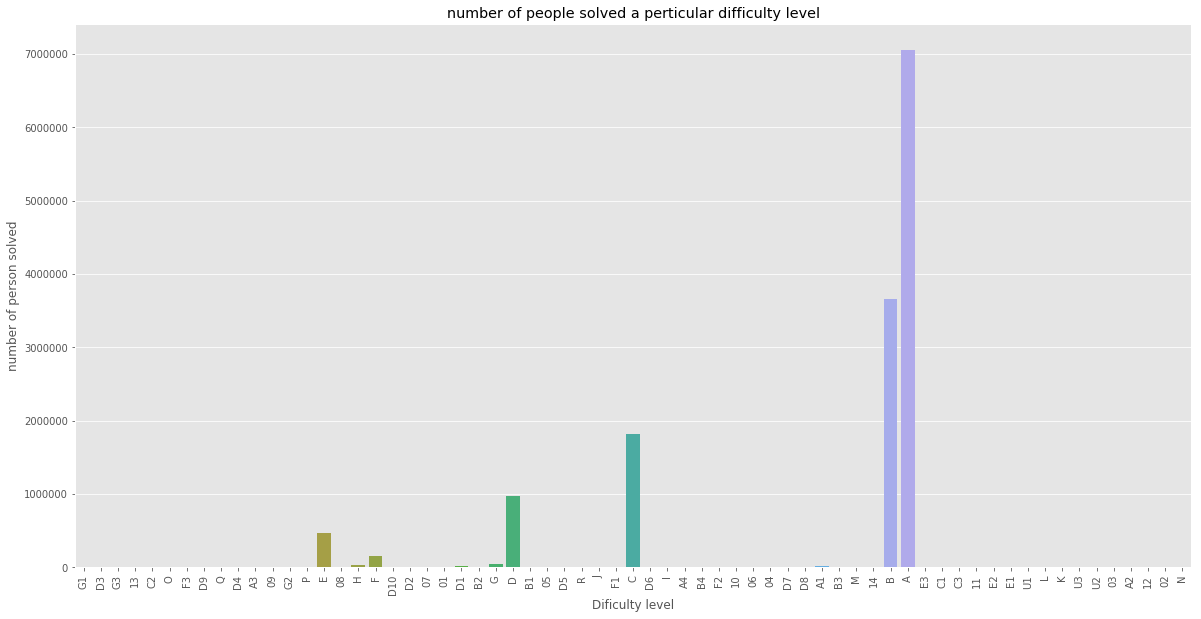

In [35]:
plt.figure(figsize=(20, 10))
plt.style.use('ggplot')
gg = sns.barplot(x=list(solvd.keys()), y=list(solvd.values()))
for item in gg.get_xticklabels():
    item.set_rotation(90)
plt.title("number of people solved a perticular difficulty level")
plt.xlabel("Dificulty level")
plt.ylabel("number of person solved")

In [47]:
new_df = pd.merge(problem_df, problem_stat_df, how='left', left_on=['contestId', ' level'], right_on=['contestId', ' level'])

In [48]:
new_df.head()

,contestId,Problem_name,type,rating,tags,level,solvedCount
0,1154,Minimum Possible LCM,PROGRAMMING,2400.0,['brute force'/ 'greedy'/ 'math'/ 'number theo...,G,834
1,1154,Shovels Shop,PROGRAMMING,2300.0,['dp'/ 'greedy'],F,947
2,1154,Two Teams,PROGRAMMING,1800.0,['data structures'/ 'implementation'/ 'sortings'],E,1967
3,1154,Walking Robot,PROGRAMMING,1400.0,['greedy'],D,4243
4,1154,Gourmet Cat,PROGRAMMING,1400.0,['implementation'/ 'math'],C,4487


In [50]:
dd = {t:0 for t in tt}
for index, row in new_df.iterrows():
    for t in tt:
        if t in row[4]:
            dd[t] += row[6]

print(len(dd))

36


Text(0, 0.5, 'number of person solved')

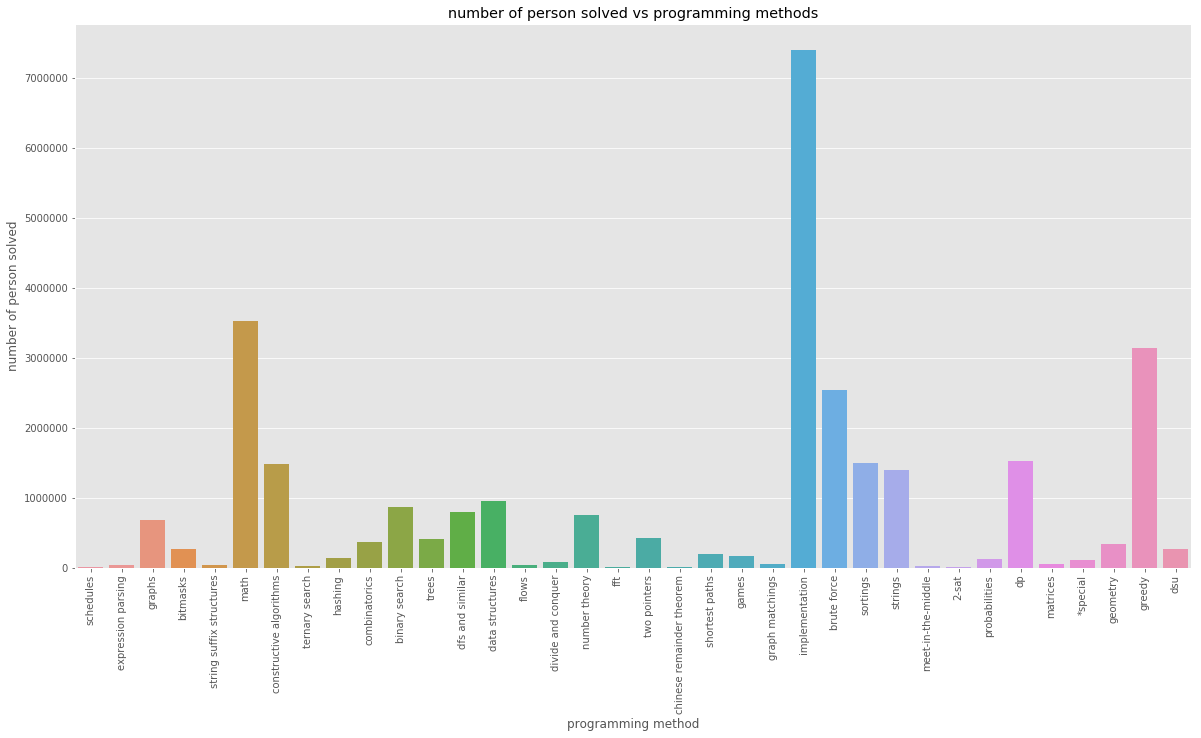

In [51]:
plt.figure(figsize=(20, 10))
plt.style.use('ggplot')
g = sns.barplot(x=list(dd.keys()), y=list(dd.values()))
for item in g.get_xticklabels():
    item.set_rotation(90)
plt.title("number of person solved vs programming methods")
plt.xlabel("programming method")
plt.ylabel("number of person solved")